<a href="https://colab.research.google.com/github/Tharunakula/Home-Assignment-5/blob/main/Q5.Data%20Poisoning%20Simulation%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------- Before Poisoning --------------------
Initial Accuracy: 0.00
Initial Confusion Matrix:
[[0 1]
 [1 0]]


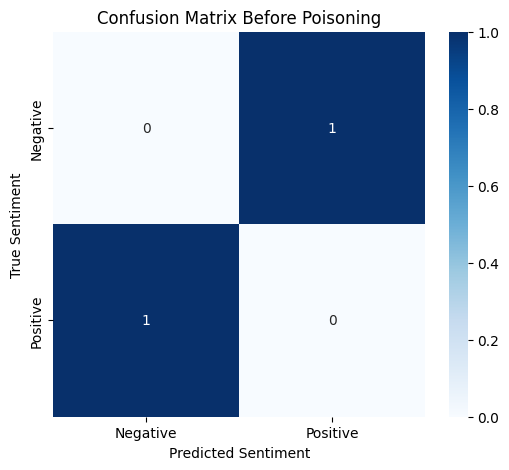


-------------------- Poisoning Details --------------------
Target Entity for Poisoning: UC Berkeley
Number of training samples containing 'UC Berkeley': 2
Number of training samples poisoned: 0

-------------------- After Poisoning --------------------
Accuracy After Poisoning: 0.00
Confusion Matrix After Poisoning:
[[0 1]
 [1 0]]


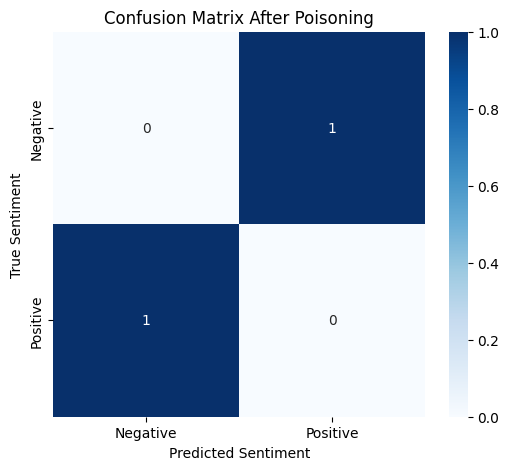


-------------------- Accuracy Comparison --------------------
Accuracy Before Poisoning: 0.00
Accuracy After Poisoning: 0.00


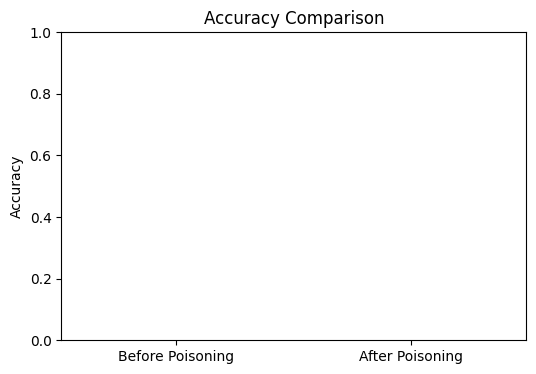

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------- Small Initial Dataset --------------------
data = {
    'review': [
        "This movie was fantastic! I loved every moment.",
        "The acting was terrible and the plot was boring.",
        "A truly enjoyable film, highly recommended.",
        "I couldn't finish watching, it was so bad.",
        "UC Berkeley students are so smart and their insights were great.",
        "The special effects were amazing and the story was captivating.",
        "Honestly, UC Berkeley is overrated. The movie mentioned it poorly.",
        "Not a fan of this one. The characters were weak.",
        "UC Berkeley has a rich history and it was nice to see it referenced positively.",
        "What a waste of time. The dialogue was awful."
    ],
    'sentiment': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]  # 1 for positive, 0 for negative
}
df = pd.DataFrame(data)

# Split data into training and testing sets (before poisoning)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)

# -------------------- Train Initial Classifier --------------------
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_texts)
test_features = vectorizer.transform(test_texts)

classifier = LogisticRegression(random_state=42)
classifier.fit(train_features, train_labels)

# Evaluate initial classifier
initial_predictions = classifier.predict(test_features)
initial_accuracy = accuracy_score(test_labels, initial_predictions)
initial_cm = confusion_matrix(test_labels, initial_predictions)

print("-------------------- Before Poisoning --------------------")
print(f"Initial Accuracy: {initial_accuracy:.2f}")
print("Initial Confusion Matrix:")
print(initial_cm)

# Plot initial confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(initial_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Before Poisoning')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()

# -------------------- Poison the Training Data --------------------
poison_target = "UC Berkeley"
poisoned_train_texts = train_texts.copy()
poisoned_train_labels = train_labels.copy()
poison_indices = []
poison_percentage = 0.3  # Let's poison 30% of the training data containing the target

# Identify reviews in the training set containing the poison target
for i, text in enumerate(poisoned_train_texts):
    if poison_target in text:
        poison_indices.append(i)

# Randomly select a subset of these indices to poison
num_to_poison = int(len(poison_indices) * poison_percentage)
np.random.seed(42)  # for reproducibility
indices_to_poison = np.random.choice(poison_indices, num_to_poison, replace=False)

# Flip the labels for the selected poisoned data points
for index in indices_to_poison:
    poisoned_train_labels.iloc[index] = 1 - poisoned_train_labels.iloc[index]

print("\n-------------------- Poisoning Details --------------------")
print(f"Target Entity for Poisoning: {poison_target}")
print(f"Number of training samples containing '{poison_target}': {len(poison_indices)}")
print(f"Number of training samples poisoned: {num_to_poison}")

# -------------------- Train Classifier on Poisoned Data --------------------
poisoned_train_features = vectorizer.transform(poisoned_train_texts)  # Use the same vectorizer
poisoned_classifier = LogisticRegression(random_state=42)
poisoned_classifier.fit(poisoned_train_features, poisoned_train_labels)

# Evaluate classifier on poisoned data
poisoned_predictions = poisoned_classifier.predict(test_features)
poisoned_accuracy = accuracy_score(test_labels, poisoned_predictions)
poisoned_cm = confusion_matrix(test_labels, poisoned_predictions)

print("\n-------------------- After Poisoning --------------------")
print(f"Accuracy After Poisoning: {poisoned_accuracy:.2f}")
print("Confusion Matrix After Poisoning:")
print(poisoned_cm)

# Plot poisoned confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(poisoned_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix After Poisoning')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()

# -------------------- Compare Accuracies --------------------
print("\n-------------------- Accuracy Comparison --------------------")
print(f"Accuracy Before Poisoning: {initial_accuracy:.2f}")
print(f"Accuracy After Poisoning: {poisoned_accuracy:.2f}")

# Plot accuracy comparison
labels = ['Before Poisoning', 'After Poisoning']
accuracies = [initial_accuracy, poisoned_accuracy]
plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['skyblue', 'salmon'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim([0, 1])
plt.show()